Nama : Wanwha SOnia Putri Artha Soetjjianto

No: PYTN-KS007-009

Modelling Bank Marketing Dataset 

Tujuan : Memprediksi keputusan klien untuk mengambil deposito berjangka

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn

import io
from io import StringIO
import string
import pandas as pd
from collections import Counter

import sklearn.tree as tree
import pydotplus
from IPython.display import Image
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix

try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
    
from pydotplus import graph_from_dot_data
import pydotplus
from PIL import Image

from six import StringIO
from IPython.display import display, Image
import sklearn.tree as tree
import pydotplus
from PIL import Image
from io import BytesIO
from sklearn.tree import export_graphviz
from sklearn import tree

plt.style.use("ggplot")

## Load the Data

Ada dua dataset yang dapat dipilih yaitu dataset yang memiliki 20 input dan 17 input. Data dengan 17 input merupakan data yang belum diperbarui. Sampel masing-masing data diperoleh dari pemilihan secara acak sebesar 10% dari data keseluruhan

### 1. Memilih Dataset

In [2]:
# dataset pertama
bank_add= pd.read_csv('bank-additional-full.csv', sep=';')

#dataset kedua
bank= pd.read_csv('bank-full.csv', sep=';')

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
bank_add.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [6]:
bank_add.shape

(41188, 21)

In [7]:
bank.shape

(45211, 17)

Karena data bank-additional-full.csv merupakan data terbaru maka analisis dan modelling dilakukan menggunakan data pada bank-additional-full.csv

Data tersebut digunakan untuk training model, sementara itu data sampel acak sebesar 10% yaitu bank-additional akan digunakansebagai data testing

### 1. Data yang akan digunakan

In [8]:
bank_train= bank_add # data training (populasi)
bank_test= pd.read_csv('bank-additional.csv', sep=';') # data testing (sampel)

In [9]:
bank_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
bank_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [11]:
bank_train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
bank_test.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Data Cleaning

### 1. Mengatasi Baris Duplikat

In [13]:
bank_train.duplicated().sum()

12

In [14]:
bank_test.duplicated().sum()

0

Terdapat 12 duplikasi data pada data training, sehingga harus dilakukan penghapusan baris duplikat

In [15]:
dup_rows= bank_train[bank_train.duplicated()]
dup_rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [16]:
# menghapus baris duplikat
bank_train= bank_train.drop_duplicates(keep='first')

In [17]:
bank_train.duplicated().sum()

0

### 2. Mengatasi missing value

In [18]:
bank_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [19]:
bank_test.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### 4. Mengelompokkan kolom berdasarkan tipe

In [20]:
kategorik=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [21]:
numerik= ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [22]:
boolean= ['y']

In [23]:
feature=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

## Visualization

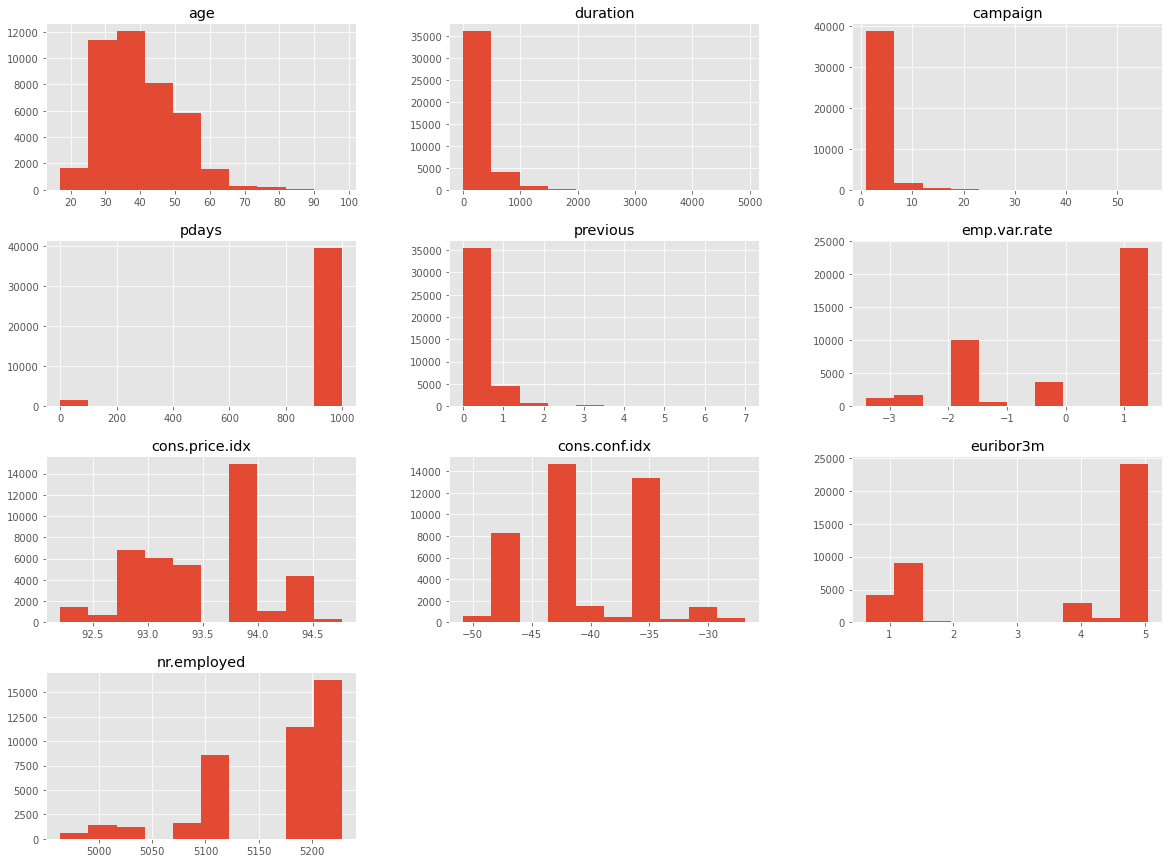

In [24]:
bank_add.hist(figsize=(20,15));
plt.savefig("hist_dist.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Terlihat bahwa data numerik pada dataset tidak berdistribusi normal

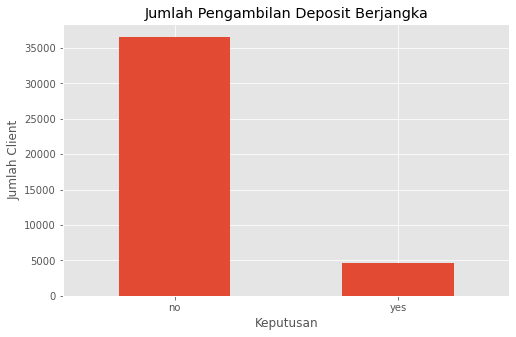

In [25]:
bank_add["y"].value_counts().plot(kind="bar", figsize=(8,5))
plt.xticks(rotation=0)
plt.title("Jumlah Pengambilan Deposit Berjangka")
plt.ylabel("Jumlah Client")
plt.xlabel("Keputusan")
plt.show()

Diagram batang tersbut menunjukkan bahwa banyak client yang tidak mengambil deposit berjangka. Hal tersebut berarti marketing gagal

## Data Preprocessing 

In [26]:
pd.options.mode.chained_assignment = None  # default='warn'

In [27]:
# Transform data kategork menjadi numerik
le = preprocessing.LabelEncoder()

for col in kategorik:
    bank_train[col] = le.fit_transform(bank_train[col])
    bank_test[col] = le.fit_transform(bank_test[col])

In [28]:
# Transform data boolean menjadi numerik
for col in boolean:
    bank_train[col] = le.fit_transform(bank_train[col])
    bank_test[col] = le.fit_transform(bank_test[col])

In [29]:
bank_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [30]:
bank_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,487,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,346,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,227,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,17,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,58,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,0,3,2,53,1,999,0,1,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,0,1,3,0,2,0,1,3,0,219,1,999,0,1,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,8,2,3,0,0,0,0,6,1,64,2,999,1,0,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,0,1,3,0,0,0,0,1,0,528,1,999,0,1,1.4,93.444,-36.1,4.966,5228.1,0


In [31]:
# Menentukan x_train and y_train
x_bank_array = bank_train[feature].to_numpy()
x_train = x_bank_array

y_bank_array = bank_train['y'].astype('int')
y_bank_array= y_bank_array.to_numpy()
y_train = y_bank_array

In [32]:
# Menentukan x_test and y_test
x_bank_array = bank_test[feature].to_numpy()
x_test = x_bank_array

y_bank_array = bank_test['y'].astype('int')
y_bank_array = y_bank_array.to_numpy()
y_test = y_bank_array

In [33]:
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

## Data Modelling

### 1. Logostic Regression

In [34]:
reg = linear_model.LogisticRegression(solver='lbfgs', max_iter=5000)
reg.fit(x_train,y_train)
y_predict = reg.predict(x_test)

In [35]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.9118718135469774


In [36]:
confusion_matrix(y_test, y_predict)

array([[3576,   92],
       [ 271,  180]], dtype=int64)

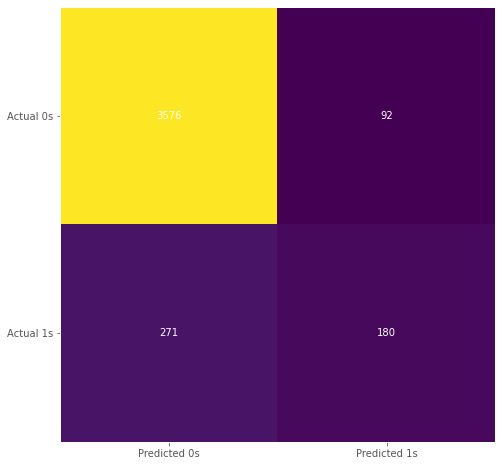

In [37]:
cm = confusion_matrix(y_test, y_predict)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.style.use('fivethirtyeight')
plt.show()

### 2. K-Nearest Neighbors

In [38]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_predict2= knn.predict(x_test)

In [39]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predict2))

Accuracy: 0.9320223355183297


In [40]:
confusion_matrix(y_test, y_predict2)

array([[3592,   76],
       [ 204,  247]], dtype=int64)

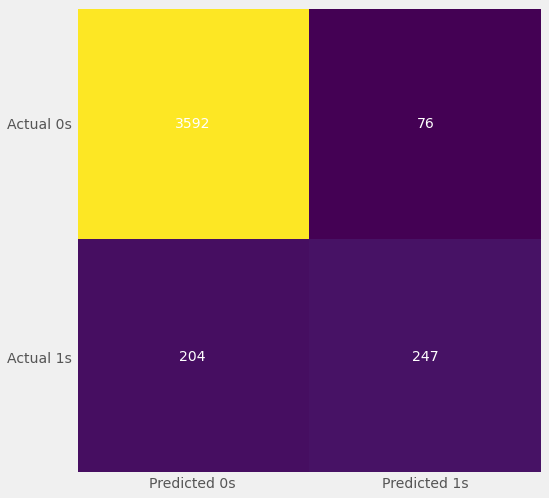

In [41]:
cm = confusion_matrix(y_test, y_predict2)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

Diperoleh akurasi sebesar 93%. Selanjutnya akan dicoba mendapatkan akurasi lebih baik dengan jumlah tetangga berbeda

In [42]:
error= []

# menghitung error dari nilai K antara 1 sampai 40
for i in range(1, 40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i= knn.predict(x_test)
    error.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Error mean')

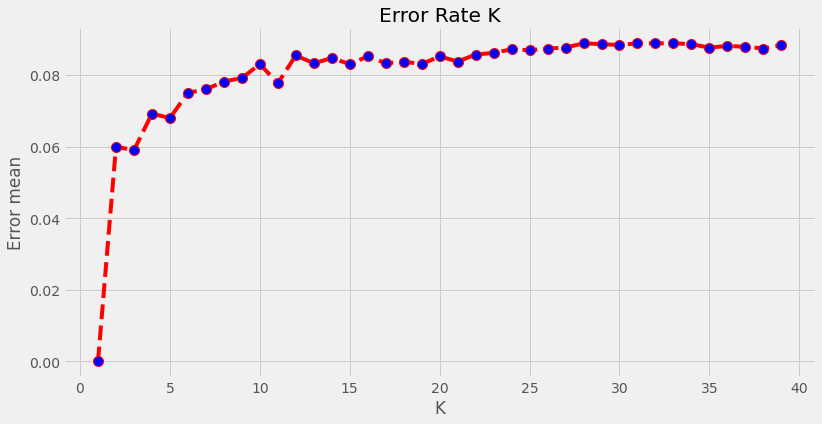

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

Plot tersebut menunjukkan bahwa eror terkecil adalah 0.000 pada K=1

In [44]:
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_predict2a= knn.predict(x_test)

In [45]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predict2a))

Accuracy: 1.0


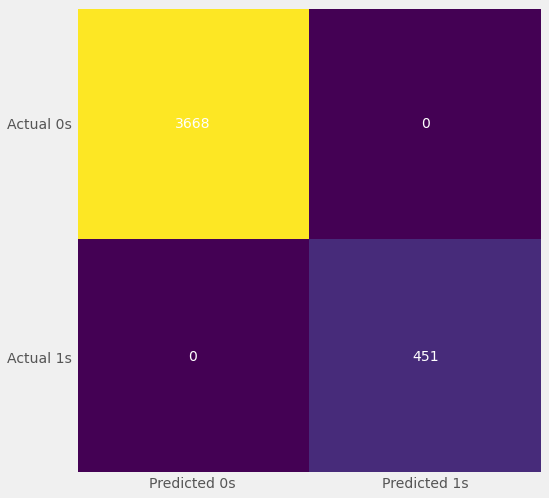

In [46]:
cm = confusion_matrix(y_test, y_predict2a)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

### 3. SVM

In [47]:
svm= svm.SVC(kernel='linear')
svm.fit(x_train, y_train)
y_predict3= svm.predict(x_test)

In [48]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predict3))

Accuracy: 0.9065307113377034


In [49]:
print("Accuracy:", metrics.precision_score(y_test, y_predict3))
print("Accuracy:", metrics.recall_score(y_test, y_predict3))

Accuracy: 0.6513761467889908
Accuracy: 0.3148558758314856


### 4. Decision Tree

In [50]:
clf= DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_predict4= clf.predict(x_test)

In [51]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predict4))

Accuracy: 0.9611556202961884


In [52]:
# optimalisasi performa Decision Tree
clf= DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(x_train, y_train)
y_predict4a= clf.predict(x_test)

In [53]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predict4a))

Accuracy: 0.902889050740471


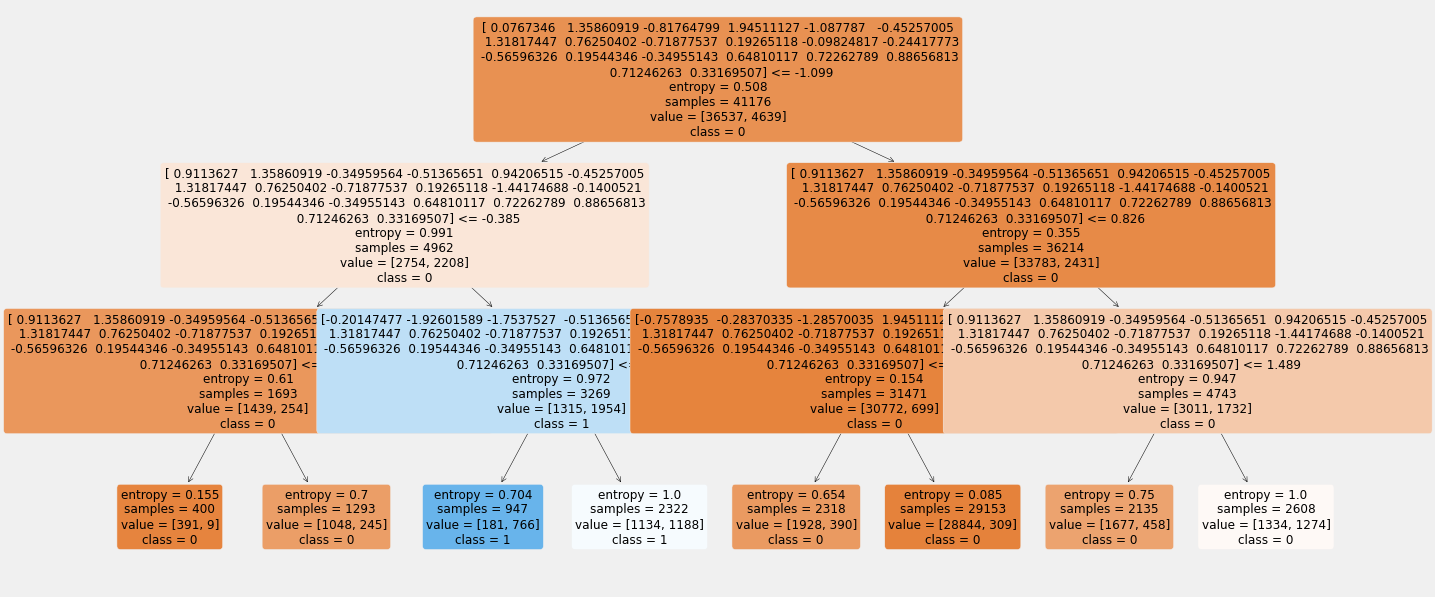

In [54]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, 
               filled=True, rounded=True, 
               feature_names = x_train,
               class_names = ['0','1'],
               fontsize=12)
plt.show()

### 5. Random Forest

In [55]:
rf= RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
y_predict5= rf.predict(x_test)

In [56]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predict5))

Accuracy: 0.9936877882981306


In [57]:
# menemukan important features
feature_imp=pd.Series(rf.feature_importances_, index=feature).sort_values(ascending=False)
feature_imp

duration          0.320336
euribor3m         0.108272
age               0.093406
nr.employed       0.064414
job               0.048756
education         0.043666
campaign          0.042286
day_of_week       0.039832
pdays             0.032809
poutcome          0.029400
marital           0.023967
emp.var.rate      0.023841
cons.conf.idx     0.022714
cons.price.idx    0.022319
housing           0.020575
month             0.016220
loan              0.015165
previous          0.012946
contact           0.010159
default           0.008918
dtype: float64

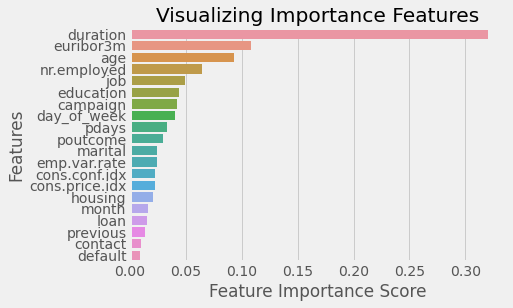

In [58]:
# visualisasi feature importance
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Importance Features")
plt.show()

In [59]:
# generating the model on selected features
from sklearn.model_selection import train_test_split
X_train=bank_train[['duration', 'euribor3m', 'age', 'nr.employed', 'job', 'education', 'campaign', 'day_of_week']]
Y_train=bank_train[['y']]

X_test=bank_test[['duration', 'euribor3m', 'age', 'nr.employed', 'job', 'education', 'campaign', 'day_of_week']]
Y_test=bank_test[['y']]

In [60]:
rf_new= RandomForestClassifier(n_estimators=100)
rf_new.fit(X_train, Y_train)
y_predict5a= rf_new.predict(X_test)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1524\4048231204.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_new.fit(X_train, Y_train)


In [61]:
print("Accuracy:", metrics.accuracy_score(Y_test, y_predict5a))

Accuracy: 1.0


### 6. Naive Bayes

In [62]:
gnb= GaussianNB()
gnb.fit(x_train, y_train)
y_predict6= gnb.predict(x_test)

In [63]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predict6))

Accuracy: 0.848264141781986


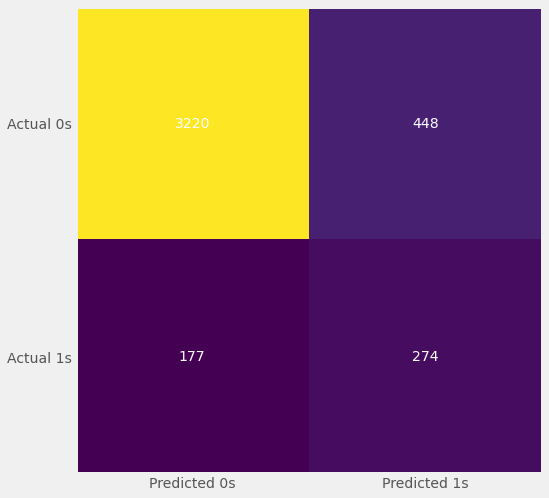

In [64]:
cm = confusion_matrix(y_test, y_predict6)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

## Model Evaluation

In [65]:
print("Logistic Regression:", metrics.accuracy_score(y_test, y_predict))
print("KNN:", metrics.accuracy_score(y_test, y_predict2a))
print("SVM:", metrics.accuracy_score(y_test, y_predict3))
print("Decision Tree:", metrics.accuracy_score(y_test, y_predict4))
print("Random Forest:", metrics.accuracy_score(Y_test, y_predict5a))
print("Naive Bayes:", metrics.accuracy_score(y_test, y_predict6))

Logistic Regression: 0.9118718135469774
KNN: 1.0
SVM: 0.9065307113377034
Decision Tree: 0.9611556202961884
Random Forest: 1.0
Naive Bayes: 0.848264141781986


In [66]:
# menuliskan hasil pemodelan ke dalam file csv
prediction= pd.DataFrame(y_predict2a, columns=['predictions']).to_csv('H8_KNN_Bank_Marketing_Prediction.csv')

## Kesimpulan

Berdasarkan hasil analisis yang diperoleh, dapat disimpulkan bahwa :
1. Dataset tidak memiliki missing value tetapi memiliki baris duplikat yang harus dihapus
2. Dataset menunjukkan bahwa banyak client yang memutuskan untuk tidak mengambil deposit berjangka
3. Algritma KNN dan Random Forest memiliki akurasi 1.0 tetapi KNN lebih baik digunakan karena tidak ada feature yang dihiangkan.